# Rapor: Proje 4 - LZW (Lempel Ziv Welch) Yöntemi ile Sıkıştırma
Ad Soyad: Önder Görmez  
Öğrenci No: 21501035

In [91]:
# used to create a dataframe
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

# NOTE: My own modules
import lzw_compressor
import lzw_decompressor


## Logging

In [92]:
import logging
import logging.config
import yaml

# Reload logging just needed for jupyter notebook for proper logging
from importlib import reload
reload(logging)

ROOT_PATH = '/home/onder/Repos/BLM6106_Data_Compression/03-Project'
LOGGER_CONFIG_PATH = ROOT_PATH + '/logger_config.yaml'

# Logger Configurations Part
# TODO: Make path relative to portability
with open(LOGGER_CONFIG_PATH, 'r') as file:
    config = yaml.safe_load(file.read())
    logging.config.dictConfig(config)

logger = logging.getLogger(__name__)


# Sıkıştırma İşlemi Yapılacak Veri Seti

* Başka bir çalışmada kullanılmış [the_happy_prince.txt](https://github.com/joeatwork/python-lzw/blob/master/tests/data/the_happy_prince.txt) [2] dosyası ile testler yapılmıştır.
* [Random Text Generator](https://www.blindtextgenerator.com/lorem-ipsum) [9] sitesinden üretilen kelimeler kullanılarak aşağıda belirtilen dosyalar oluşturulmuştur.
  * random_short.txt
  * random_medium.txt
  * random_long.txt


In [93]:
# TEXT_FILE_PATH = ROOT_PATH + '/the_happy_prince.txt'
# COMPRESSED_FILE_PATH = ROOT_PATH + '/the_happy_prince.lzw'

# TEXT_FILE_PATH = ROOT_PATH + '/random_short.txt'
# COMPRESSED_FILE_PATH = ROOT_PATH + '/random_short.lzw'

TEXT_FILE_PATH = ROOT_PATH + '/random_medium.txt'
COMPRESSED_FILE_PATH = ROOT_PATH + '/random_medium.lzw'

# TEXT_FILE_PATH = ROOT_PATH + '/random_long.txt'
# COMPRESSED_FILE_PATH = ROOT_PATH + '/random_long.lzw'


In [94]:
def get_file_size(file_path):
    file_stats = os.stat(file_path)
    logger.info("'{0}' file size is {1} bytes".format(os.path.basename(file_path), file_stats.st_size));

    return file_stats.st_size

get_file_size(TEXT_FILE_PATH)


[INFO] [2024-01-08T10:47:20.001Z] 'random_medium.txt' file size is 1395552 bytes


1395552

# LZW Compression Function

In [95]:
def my_compressor_function(file_path, codebook_size):
    start_time = time.time()

    lzw_compressor.compress(file_path, codebook_size)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_time_in_micro_sec = int(elapsed_time*1000000)
    logger.info("Compression time in us: %d" % elapsed_time_in_micro_sec)
    print("Compression time in us: %d" % elapsed_time_in_micro_sec)

    compressed_file_path = COMPRESSED_FILE_PATH
    return elapsed_time_in_micro_sec, compressed_file_path


## Compression Ratio (CR) Calculation

\begin{equation}
\text{Compression Ratio (CR)} = \frac{\text{size of the output stream}} {\text{size of the input stream}} 
\end{equation}


In [96]:
def calculate_compression_ratio(original_file_size, compressed_file_size):
    return compressed_file_size/original_file_size


## Compression Performance (CP) Calculation

\begin{equation}
\text{Compression Performance (CP)} = 100 * (1 - CR) 
\end{equation}

In [97]:
def calculate_compression_performance(original_file_size, compressed_file_size):
    compression_ratio = calculate_compression_ratio(original_file_size, compressed_file_size)

    return 100 * (1 - compression_ratio)


# LZW Decompression Function

In [98]:
def my_decompressor_function(file_path):
    start_time = time.time()

    lzw_decompressor.decompress(file_path)

    end_time = time.time()
    elapsed_time = end_time - start_time
    elapsed_time_in_micro_sec = int(elapsed_time*1000000)
    logger.info("Decompression time in us: %d" % elapsed_time_in_micro_sec)
    print("Decompression time in us: %d" % elapsed_time_in_micro_sec)
    return elapsed_time_in_micro_sec


# Algorithm in Action

In [99]:
START_BIT_SIZE = 10
END_BIT_SIZE = 16

different_codebook_sizes = []
original_file_size_array = []
compressed_file_size_array = []
compression_ratio_array = []
compression_performance_array = []
compression_time_array = []
decompression_time_array = []
for bit_size in range(START_BIT_SIZE, END_BIT_SIZE+1):

    logger.info(f"Bit size: {bit_size}")
    
    codebook_size = 2**bit_size
    different_codebook_sizes.append(codebook_size)
    logger.info(f"Max codebook size: {codebook_size}")

    elapsed_time_in_micro_sec, compressed_file_path = my_compressor_function(TEXT_FILE_PATH, codebook_size)
    compression_time_array.append(elapsed_time_in_micro_sec)

    original_file_size = get_file_size(TEXT_FILE_PATH)
    original_file_size_array.append(original_file_size)

    compressed_file_size = get_file_size(COMPRESSED_FILE_PATH)
    compressed_file_size_array.append(compressed_file_size)
    
    compression_ratio = calculate_compression_ratio(original_file_size, compressed_file_size)
    compression_ratio_array.append(compression_ratio)

    compression_performance = calculate_compression_performance(original_file_size, compressed_file_size)
    compression_performance_array.append(compression_performance)

    elapsed_time_in_micro_sec = my_decompressor_function(COMPRESSED_FILE_PATH)
    decompression_time_array.append(elapsed_time_in_micro_sec)

print(f"different_codebook_sizes: {different_codebook_sizes}")


[INFO] [2024-01-08T10:47:20.054Z] Bit size: 10
[INFO] [2024-01-08T10:47:20.055Z] Max codebook size: 1024
[WARNING] [2024-01-08T10:47:20.214Z] Final codebook size: 1025
[INFO] [2024-01-08T10:47:20.264Z] Compression time in us: 207779
Compression time in us: 207779
[INFO] [2024-01-08T10:47:20.264Z] 'random_medium.txt' file size is 1395552 bytes
[INFO] [2024-01-08T10:47:20.264Z] 'random_medium.lzw' file size is 1039772 bytes
[INFO] [2024-01-08T10:47:20.482Z] Decompression time in us: 217687
Decompression time in us: 217687
[INFO] [2024-01-08T10:47:20.483Z] Bit size: 11
[INFO] [2024-01-08T10:47:20.483Z] Max codebook size: 2048
[WARNING] [2024-01-08T10:47:20.590Z] Final codebook size: 2049
[INFO] [2024-01-08T10:47:20.624Z] Compression time in us: 140393
Compression time in us: 140393
[INFO] [2024-01-08T10:47:20.625Z] 'random_medium.txt' file size is 1395552 bytes
[INFO] [2024-01-08T10:47:20.625Z] 'random_medium.lzw' file size is 759888 bytes
[INFO] [2024-01-08T10:47:20.797Z] Decompression t

# Deneyler ve Sonuçlar

In [100]:
performance_metrics = ['Original File Size (bytes)', 'Compressed File Size (bytes)', 'Compression Ratio',
                       'Compression Performance', 'Compression Time (us)', 'Decompression Time (us)']

results_matrix_df = pd.DataFrame(columns=performance_metrics, index=different_codebook_sizes)

results_matrix_df['Original File Size (bytes)'] = original_file_size_array
results_matrix_df['Compressed File Size (bytes)'] = compressed_file_size_array
results_matrix_df['Compression Ratio'] = compression_ratio_array
results_matrix_df['Compression Performance'] = compression_performance_array
results_matrix_df['Compression Performance'] = results_matrix_df['Compression Performance'].astype(str) + '%'
results_matrix_df['Compression Time (us)'] = compression_time_array
results_matrix_df['Decompression Time (us)'] = decompression_time_array


In [101]:
col = ['Time (us)', 'Time (ms)', 'Time (sec)']
index = ['Compression', 'Decompression']
total_compression_and_decompression_time_df = pd.DataFrame(columns=col, index=index)

total_time_in_us_array = []
total_time_in_us_array.append(results_matrix_df['Compression Time (us)'].sum())
total_time_in_us_array.append(results_matrix_df['Decompression Time (us)'].sum())

total_time_in_ms_array = []
total_time_in_ms_array.append(results_matrix_df['Compression Time (us)'].sum()/1000)
total_time_in_ms_array.append(results_matrix_df['Decompression Time (us)'].sum()/1000)

total_time_in_sec_array = []
total_time_in_sec_array.append(results_matrix_df['Compression Time (us)'].sum()/1000000)
total_time_in_sec_array.append(results_matrix_df['Decompression Time (us)'].sum()/1000000)

total_compression_and_decompression_time_df['Time (us)'] = total_time_in_us_array
total_compression_and_decompression_time_df['Time (ms)'] = total_time_in_ms_array
total_compression_and_decompression_time_df['Time (sec)'] = total_time_in_sec_array


* Decompression işlemi daha uzun sürüyor.

In [102]:
total_compression_and_decompression_time_df


,Time (us),Time (ms),Time (sec)
Compression,946174,946.174,0.946174
Decompression,894755,894.755,0.894755


* **Codebook çok küçük** olduğu zaman compression performance düşük çıkıyor.
* **Codebook** boyutu **belirli bir nokta**dan sonra sonucu **etkilemiyor**.
* Aynı veri üzerinde codebook artarsa;
  * compression ve decompression time azalıyor.
  * Tekrar eden pattern lerin sayısı **codebook boyutuna sığdıktan** sonra codebook size arttıkça sonuç etkilenmiyor.

In [103]:
results_matrix_df


,Original File Size (bytes),Compressed File Size (bytes),Compression Ratio,Compression Performance,Compression Time (us),Decompression Time (us)
1024,1395552,1039772,0.745061,25.493854761413402%,207779,217687
2048,1395552,759888,0.544507,45.549288023663756%,140393,171502
4096,1395552,566078,0.405630,59.43698264199399%,119024,155816
8192,1395552,402460,0.288388,71.16123225791657%,114664,115898
16384,1395552,263764,0.189003,81.099665222077%,108091,90877
32768,1395552,171450,0.122855,87.71453876315609%,114738,75210
65536,1395552,138640,0.099344,90.06557978491665%,141485,67765


### Grafikler
Yukarıdaki tabloda elde edilen veriler ile aşağıdaki grafikler çizdirilmiştir.
* Codebook Size - Compression Performance (%)
* Codebook Size - Compression Time (us)
* Codebook Size - Decompression Time (us)


### Compression Performance Graph

Grafiğe bakılırsa;
* Exponansiyel bir bağıntı
* Codebook size ın çok küçük değerlerinde performan düşük çıkmaktadır.
* %80 performansa ulaşması için codebook size ın (10000 - 20000 arası) çok büyük olmasına gerek yok.

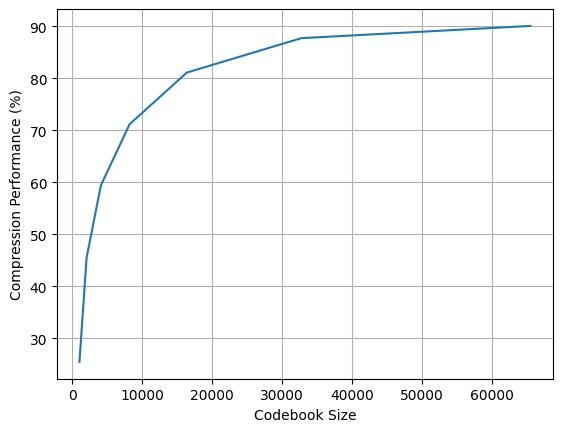

In [104]:
plt.plot(different_codebook_sizes, compression_performance_array) 
plt.xlabel('Codebook Size')
plt.ylabel('Compression Performance (%)')

plt.grid(True)
plt.show()


### Compression & Decompression Time Graph

Grafiğe bakılırsa;
* **Codebook size çok küçük** iken compression ve decompression **time yüksek** çıkmaktadır. 

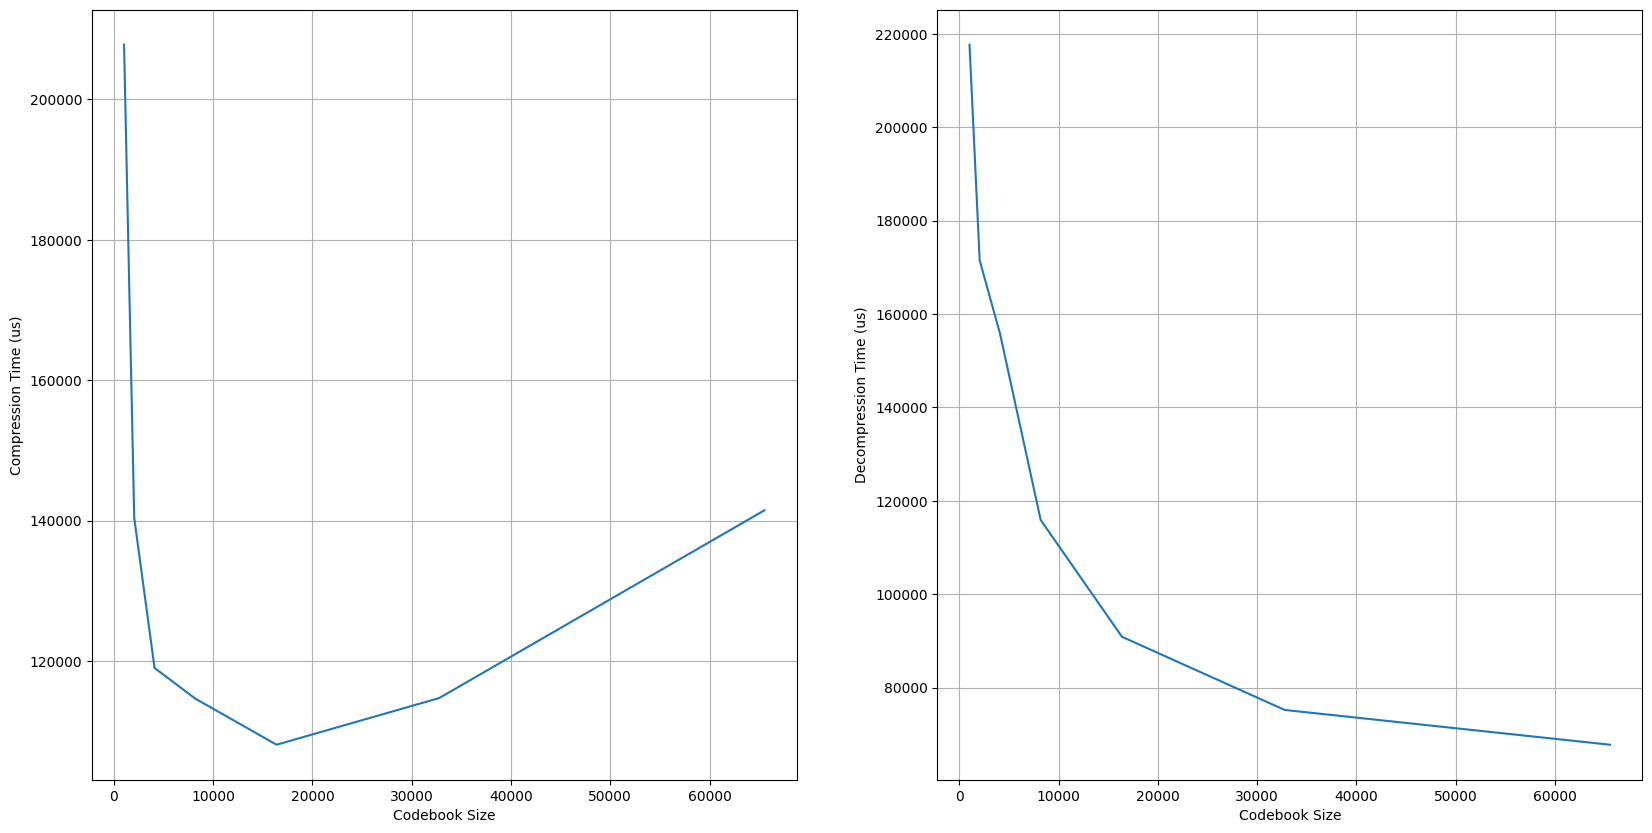

In [105]:
figure, axis = plt.subplots(1, 2, figsize=(20, 10)) 
  
axis[0].plot(different_codebook_sizes, compression_time_array) 
axis[0].set_xlabel("Codebook Size")
axis[0].set_ylabel("Compression Time (us)")
axis[0].grid(True)
  
axis[1].plot(different_codebook_sizes, decompression_time_array) 
axis[1].set_xlabel("Codebook Size")
axis[1].set_ylabel("Decompression Time (us)")
axis[1].grid(True)


plt.grid(True)
plt.show()


# Kısıtlamalar
* Çalışma sadece metin üzerinde denenmiştir.
* Diğer dosya formatları için çalışma yapılmamıştır.

# Referanslar

* [1] [A Technique for High-Performance Data Compression](https://courses.cs.duke.edu/spring03/cps296.5/papers/welch_1984_technique_for.pdf) - Bu yöntemin ilk yanınlandığı makaledir.
* [2] [the_happy_prince.txt](https://github.com/joeatwork/python-lzw/blob/master/tests/data/the_happy_prince.txt)
* [3] [Aditya Gupta --> LZW-Compressor-in-Python](https://github.com/adityagupta3006/LZW-Compressor-in-Python)
* [4] [Python Sleep Milliseconds with Examples](https://sparkbyexamples.com/python/python-sleep-milliseconds/)
* [5] [Measure elapsed time in Python](https://pythonhow.com/how/measure-elapsed-time-in-python)
* [6] [How to Generate Random Numbers in Python?](https://www.shiksha.com/online-courses/articles/how-to-generate-random-numbers-in-python/)
* [7] [Plot multiple plots in Matplotlib](https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/)
* [8] [How to Get File Size in Python](https://www.digitalocean.com/community/tutorials/how-to-get-file-size-in-python)
* [9] [Random Text Generator](https://www.blindtextgenerator.com/lorem-ipsum)